# Name : Deepak Dwivedi
# ID:  11920001
### Question 2

# KNN Classifier

In [34]:
import pandas as pd
import itertools
import os 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None,"display.max_rows", None)
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity,KNeighborsClassifier

In [4]:
data=pd.read_csv("letter-recognition.csv")
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [18]:
train_df,test_df = train_test_split(data,test_size=0.3,stratify=data['letter'],random_state=11)
x_train=train_df.iloc[:,1:]
y_train=train_df.iloc[:,:1]
x_test=test_df.iloc[:,1:]
y_test=test_df.iloc[:,:1]

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel())
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 






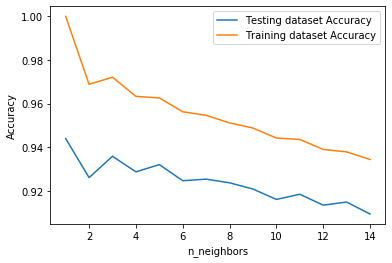

In [32]:
#test

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

# Parzen Window Classifier

In [334]:

def Predict(x_train,y_train2,x_test,y_test,classes,h):
    num_test_samples = y_test.shape[0]
   
    tst=[]
    prob=[]
    cls=[]
    m_index=[]
    ypred=[]
    for i in range(num_test_samples):
        x_ = x_train - x_test.iloc[i, :]
        x_ = np.exp(-(np.linalg.norm(x_, axis = 1) ** 2) / (2 * h ** 2))
        prediction = classes[0]
        prob2=[]
        for j in classes:
            temp = y_train2 == j
            temp.reset_index(inplace=True)
            temp2=temp.iloc[:,1]
            cnt1=temp2.sum()
            prob1 = x_[temp2].sum()
            t_ = prob1.sum()
            cnt2=x_train.shape[0]-cnt1
            tst.append(i)
            prob.append(prob1/cnt1)
            prob2.append(prob1/cnt1)
            cls.append(j)
        #m_index.append(prob2.index(max(prob2)))
        ypred.append(classes[prob2.index(max(prob2))])
    return np.asarray(ypred)

def Accuracy(predictions, y):
    predictions = predictions.reshape(predictions.shape[0], 1)
    y = y.reshape(y.shape[0], 1)
    return (predictions == y).sum() / y.shape[0]

In [341]:
classes=y_test["letter"].unique()
test_accuracy=[]
train_accuracy=[]
sigma=[]
for i in range(1,11):
    test_output=Predict(X_train,y_train, X_test,y_test,classes,i)
    test_accuracy.append(Accuracy(test_output,np.array(y_test)))
    train_output=Predict(X_train,y_train, X_train,y_train,classes,i)
    train_accuracy.append(Accuracy(train_output,np.array(y_train)))
    sigma.append(i)


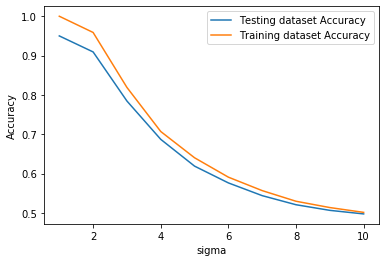

In [344]:
plt.plot(sigma, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(sigma, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.show()

seems data has been normalized so with sigma train and test accuracy decreasing gradually.
same trend has been observed in KNN classifer.
